# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mousestudy_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_mousestudy_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [5]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [6]:
# Checking the number of mice.
mouse_count = mouse_metadata["Mouse ID"].nunique()
mouse_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_time_duplicates = combined_mousestudy_data[combined_mousestudy_data.duplicated()]
mouse_time_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Optional: Get all the data for the duplicate mouse ID.    # Filtering by Column with a String
combined_mousestudy_data.loc[combined_mousestudy_data["Mouse ID"]==str("g989"),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
combined_mousestudy_data.loc[combined_mousestudy_data["Mouse ID"]!=str("g989"),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mousestudy_data_clean = combined_mousestudy_data.set_index('Mouse ID').drop("g989", axis=0).reset_index()
combined_mousestudy_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
len(combined_mousestudy_data_clean["Mouse ID"].unique())

combined_ms_final =combined_mousestudy_data_clean
combined_ms_final
len(combined_ms_final["Mouse ID"].unique())

248

In [12]:
combined_ms_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_regimen = combined_ms_final.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
med_regimen = combined_ms_final.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
var_regimen = combined_ms_final.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
stdev_regimen = combined_ms_final.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
sem_regimen = combined_ms_final.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()
resume_summary = pd.merge(mean_regimen, med_regimen, on="Drug Regimen")
resume_summary.rename(columns={
    "Tumor Volume (mm3)_x":"Mean",
   "Tumor Volume (mm3)_y":"Median",
    },inplace=True)
resume_summary = pd.merge(resume_summary, var_regimen, on="Drug Regimen")
resume_summary = pd.merge(resume_summary, stdev_regimen, on="Drug Regimen")
resume_summary = pd.merge(resume_summary, sem_regimen, on="Drug Regimen")
resume_summary.rename(columns={
     "Tumor Volume (mm3)_x":"Var",
    "Tumor Volume (mm3)_y":"Std",
     "Tumor Volume (mm3)":"SEM"
},inplace=True)
resume_summary.info()
resume_summary





<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Capomulin to Zoniferol
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mean    10 non-null     float64
 1   Median  10 non-null     float64
 2   Var     10 non-null     float64
 3   Std     10 non-null     float64
 4   SEM     10 non-null     float64
dtypes: float64(5)
memory usage: 480.0+ bytes


,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
combined_ms_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#combined_ms_final
#tumor_volume_data = combined_ms_final.drop(['Metastatic Sites','Mouse ID','Timepoint','Sex','Age_months','Weight (g)'],axis='columns')
#tumor_volume_data.set_index('Drug Regimen')
#tumor_volume_data.describe()

## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
combined_ms_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


<Axes: xlabel='Drug Regimen', ylabel='Number of Observe Timepoints'>

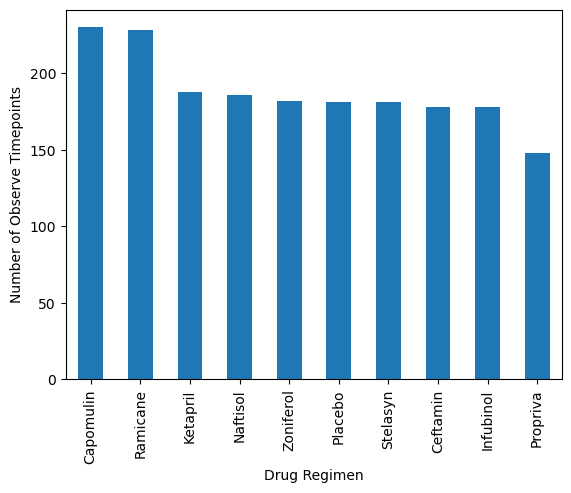

In [17]:
combined_ms_final
drugtp = combined_ms_final.groupby("Drug Regimen")
drugtpchart = drugtp['Timepoint'].count().sort_values(ascending=False)
drugtpchart.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Observe Timepoints')


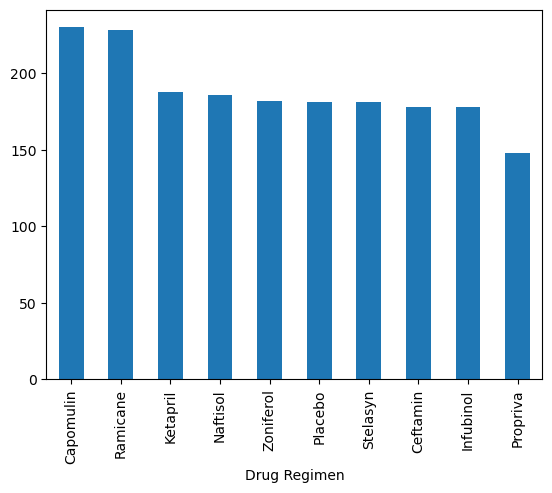

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugtpchart.plot.bar()
plt.show()

<Axes: ylabel='Sex'>

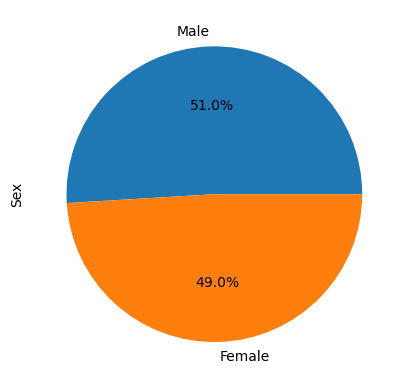

In [19]:
mice_sex = combined_ms_final.groupby("Sex")
mice_sex_count = mice_sex['Sex'].count().sort_values(ascending=False)
mice_sex_count.plot(kind='pie', ylabel='Sex',autopct='%1.1f%%')

In [20]:
mice_sex_count

Sex
Male      958
Female    922
Name: Sex, dtype: int64

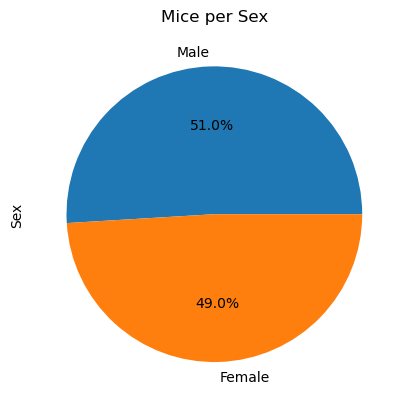

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex_count,labels=mice_sex_count.index,autopct='%1.1f%%')
plt.title("Mice per Sex")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_times = combined_ms_final.groupby('Mouse ID')['Timepoint'].max().reset_index().merge(combined_ms_final, on=['Mouse ID','Timepoint'])
max_times.rename(columns={
     "Tumor Volume (mm3)":"Final Tumor Vol",
   },inplace=True)
max_times.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Vol,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_drug = max_times.loc[max_times["Drug Regimen"]==drug,:]
    quartiles = max_drug["Final Tumor Vol"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of Final Tumor Vol for {drug} is: {lowerq}")
    print(f"The upper quartile of Final Tumor Vol for {drug} is: {upperq}")
    print(f"The interquartile range of Final Tumor Vol for {drug} is: {iqr}")
    print(f"The the median of Final Tumor Vol for {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
       # Determine outliers using upper and lower bounds
    outlier_vol = max_drug.loc[(max_drug['Final Tumor Vol'] < 
       lower_bound) | (max_drug['Final Tumor Vol'] > upper_bound)]
    if len(outlier_vol) == 0:
        print(f"\n{drug} has no potential outliers\n")
    else:
        print(f"\nPotential outliers for {drug}")
        print(outlier_vol.to_string(index=False))
    ## add subset 
    max_drug = max_drug.loc[:,"Final Tumor Vol"]
    final_vol.append(max_drug)
  

The lower quartile of Final Tumor Vol for Capomulin is: 32.37735684
The upper quartile of Final Tumor Vol for Capomulin is: 40.1592203
The interquartile range of Final Tumor Vol for Capomulin is: 7.781863460000004
The the median of Final Tumor Vol for Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Capomulin has no potential outliers

The lower quartile of Final Tumor Vol for Ramicane is: 31.56046955
The upper quartile of Final Tumor Vol for Ramicane is: 40.65900627
The interquartile range of Final Tumor Vol for Ramicane is: 9.098536719999998
The the median of Final Tumor Vol for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Ramicane has no potential outliers

The lower quartile of Final Tumor Vol for Infubinol is: 54.04860769
The upper quartile of Final Tumor Vol for Infubinol is: 65.52574285
The interquartile range of Final Tumor Vol for

C:\Users\miguel.vargas\AppData\Local\Temp\ipykernel_17364\3111222689.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(regimen)


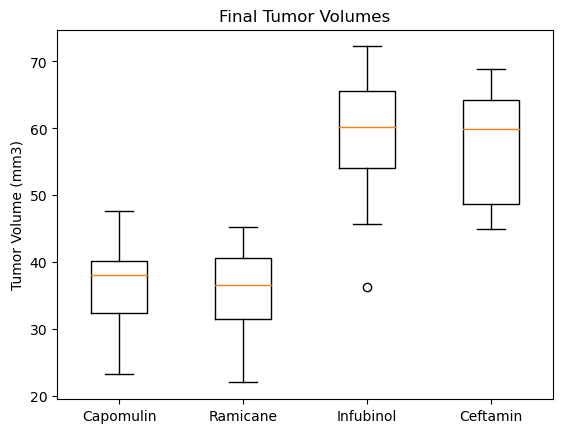

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(regimen)
bp = ax1.boxplot(final_vol)
plt.show()


## Line and Scatter Plots

In [26]:
combined_ms_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [27]:
capomulin_mouse = combined_ms_final.loc[combined_ms_final["Drug Regimen"]==("Capomulin"),:] 
#filter_one_mouse = filter_one_mouse.loc[filter_one_mouse['Drug Regimen']=="Capomulin",:]
capomulin_mouse = combined_ms_final.loc[combined_ms_final["Mouse ID"]==("s185"),:]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


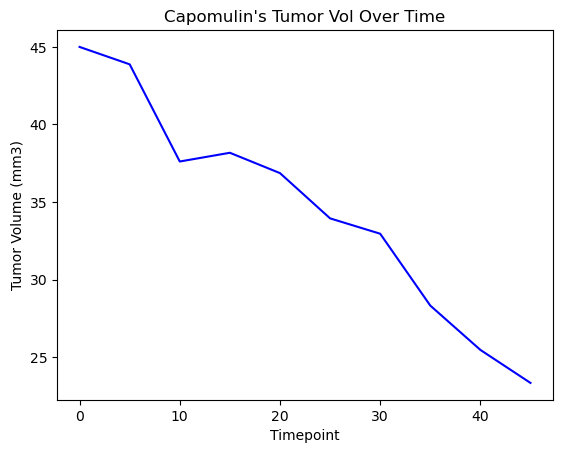

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_vol = list(capomulin_mouse["Tumor Volume (mm3)"])
fig2, ax2 = plt.subplots()
ax2.set_title(f"{capomulin_mouse.iloc[0][1]}'s Tumor Vol Over Time")
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint')
ax2.plot(capomulin_mouse["Timepoint"],capomulin_mouse["Tumor Volume (mm3)"],color="blue")
plt.show()

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomuline_regime = combined_ms_final.loc[combined_ms_final["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
capomuline_regime

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


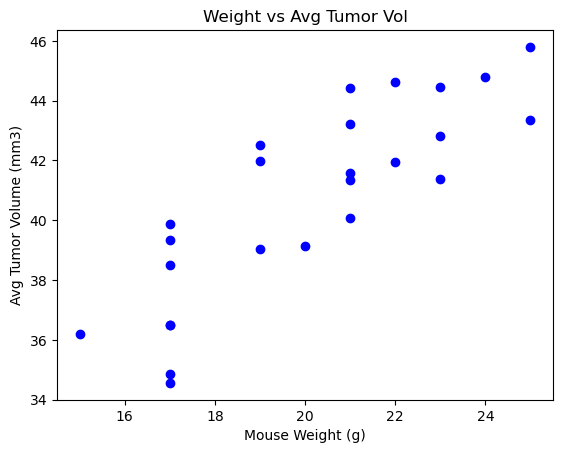

In [30]:
plt.scatter(capomuline_regime["Weight (g)"],capomuline_regime["Tumor Volume (mm3)"],color="blue")
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

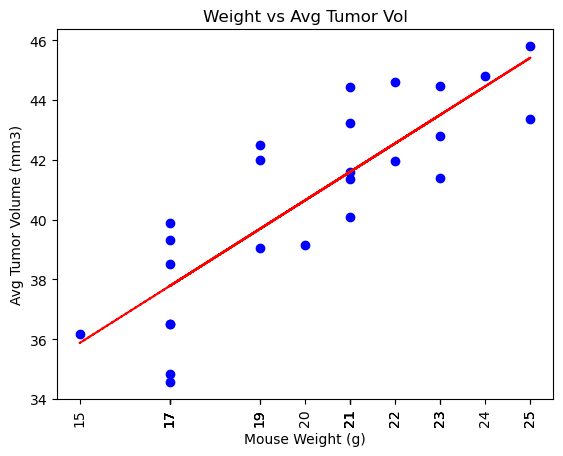

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomuline_slope, capomuline_int, capomuline_r, capomuline_p, capomuline_std_err = st.linregress(capomuline_regime["Weight (g)"],capomuline_regime["Tumor Volume (mm3)"])
capo_fit = capomuline_slope * capomuline_regime["Weight (g)"] + capomuline_int
plt.scatter(capomuline_regime["Weight (g)"],capomuline_regime["Tumor Volume (mm3)"],color="blue")
plt.plot(capomuline_regime["Weight (g)"],capo_fit,"--",color="r")
plt.xticks(capomuline_regime["Weight (g)"], rotation=90)
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()
